In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import os

In [3]:
import numpy as np

In [4]:
from pandas import *
from tqdm import tqdm

In [5]:
df=read_csv("ready_data.csv",)

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df_classes=read_csv("ready_classes.csv")

In [14]:
df_classes.drop("Unnamed: 0",axis=1,inplace=True)

In [16]:
df_classes['y']=df_classes['class'].map(
    {
        'not ready':0,
        'ready':1
    }
)

In [17]:
df_classes

,class,y
0,not ready,0
1,not ready,0
2,not ready,0
3,not ready,0
4,not ready,0
...,...,...
1006,ready,1
1007,ready,1
1008,ready,1
1009,ready,1


<Axes: xlabel='y'>

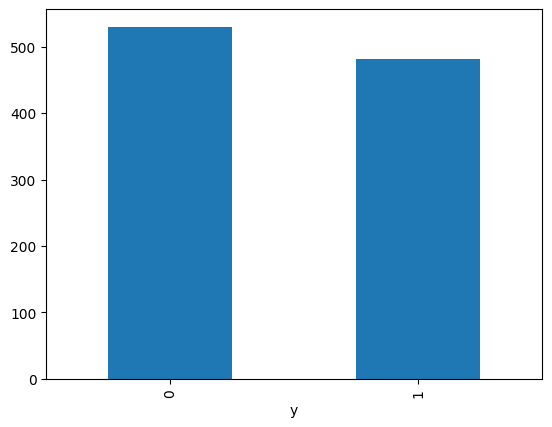

In [26]:
df_classes['y'].value_counts().plot(kind='bar')

In [27]:
from sklearn.preprocessing import StandardScaler

In [78]:
x=df.to_numpy()

In [67]:
y=df_classes['y'].values

In [40]:
scaler=StandardScaler()

In [47]:
x=scaler.fit_transform(x)

In [45]:
from seaborn import *

C:\Users\vivek chouhan\AppData\Local\Temp\ipykernel_19128\2501188173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplot(x,kde=True,color='red')
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

<Axes: ylabel='Density'>

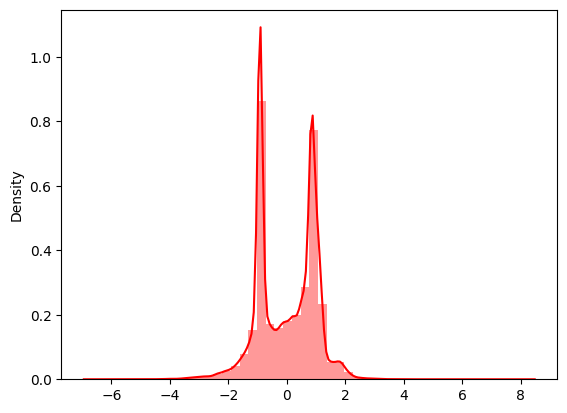

In [48]:
distplot(x,kde=True,color='red')

In [51]:
input_layers=len(df.columns)

In [52]:
input_layers

225

In [55]:
x.shape

(1011, 225)

In [53]:
model=keras.Sequential()

In [56]:
model.add(
    keras.layers.Dense(128,activation='relu',input_shape=(255,))
)
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(2,activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [57]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test =train_test_split(x,y,stratify=y,test_size=0.15)

In [70]:
history=model.fit(X_train,y_train,epochs=20)

Epoch 1/20
27/27 [==============================] - 5s 8ms/step - loss: 0.1264 - accuracy: 0.9476
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9988
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 8.3543e-04 - accuracy: 1.0000
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 5.4782e-04 - accuracy: 1.0000
Epoch 6/20
27/27 [==============================] - 0s 4ms/step - loss: 3.8315e-04 - accuracy: 1.0000
Epoch 7/20
27/27 [==============================] - 0s 4ms/step - loss: 2.6765e-04 - accuracy: 1.0000
Epoch 8/20
27/27 [==============================] - 0s 3ms/step - loss: 2.0414e-04 - accuracy: 1.0000
Epoch 9/20
27/27 [==============================] - 0s 3ms/step - loss: 1.5647e-04 - accuracy: 1.0000
Epoch 10/20
27/27 [==============================] - 0s 4ms/step - loss: 1.2623e-04 - accuracy

In [91]:
import matplotlib.pyplot as plt

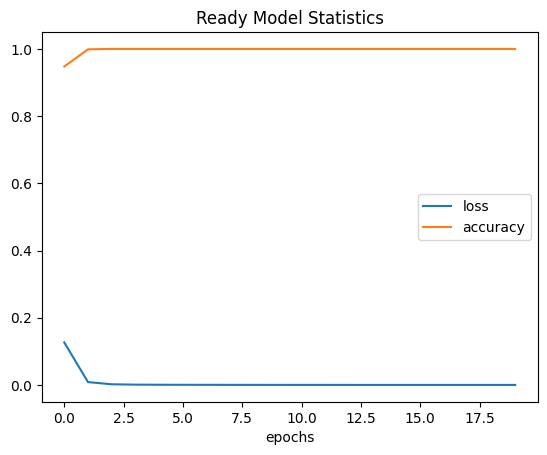

In [100]:
DataFrame(history.history).plot()
plt.title("Ready Model Statistics")

plt.xlabel("epochs")
plt.savefig("stats.png")

In [95]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000


[0.007136476691812277, 1.0]

In [77]:
model.save("ready_model_nn.keras")

In [79]:
model1=model

In [82]:
model1.fit(X_train,y_train,epochs=20)

Epoch 1/20
27/27 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9243
Epoch 2/20
27/27 [==============================] - 0s 4ms/step - loss: 0.0531 - accuracy: 0.9837
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9849
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9872
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9872
Epoch 6/20
27/27 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9872
Epoch 7/20
27/27 [==============================] - 0s 4ms/step - loss: 0.0439 - accuracy: 0.9860
Epoch 8/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9895
Epoch 9/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9930
Epoch 10/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9930
Epoch 11/20
27/27 [

In [83]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 750us/step - loss: 0.0071 - accuracy: 1.0000


[0.007136476691812277, 1.0]

In [86]:
y_p=[np.argmax(i) for i in model.predict(X_test)]

5/5 [==============================] - 0s 6ms/step


<Axes: >

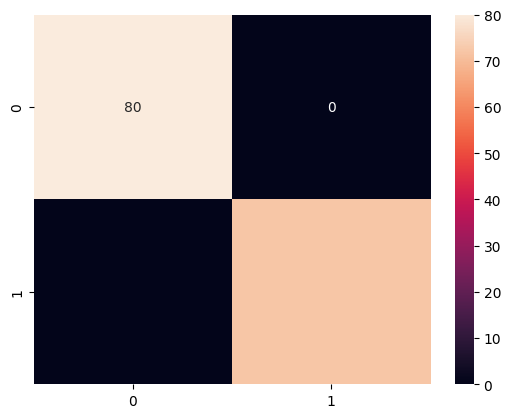

In [89]:
heatmap(tf.math.confusion_matrix(y_test,y_p),annot=True)

In [101]:
scaler

StandardScaler()

In [102]:
import pickle

In [103]:
pickle.dump(scaler,open("ready_model_scaler.pkl","wb"))